In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from Higgs_R2.background import Background
from Higgs_R2.Potential import Potential_function
from Higgs_R2.perturbations import Perturbations

plt.style.use('style')
from pathlib import Path

In [2]:
# Ruta a Figures desde el notebook actual
fig_dir = Path.cwd().parents[1] / "Paper" / "Figures"
fig_dir.mkdir(parents=True, exist_ok=True)

def savefig(name, ext="pdf"):
    from pathlib import Path
    import matplotlib.pyplot as plt

    fig_dir = Path.cwd().parents[1] / "Paper" / "Figures"
    fig_dir.mkdir(parents=True, exist_ok=True)
    path = fig_dir / f"{name}.{ext}"
    plt.savefig(path, bbox_inches="tight", dpi=300, pad_inches = 0.1)
    print(f"✅ Figura guardada en {path}")

In [3]:
V = 'exp(-sqrt(8/3)*phi)*(lambda_h*h**4/4 + (1/(16*xi_s))*(exp(sqrt(2/3)*phi) - 1 - xi*h**2)**2)'
parameters = {'lambda_h': 1e-10, 'xi': 1e-1 , 'xi_s': 4e8}
potential = Potential_function.from_string(V, param_values=parameters)

In [4]:
bg = Background(potential, phi0= 5.7, h0 = 1e-4, lambda_h= 1e-10, xi = 1e-1, xi_s = 4e8)

In [5]:
vars = ['N', 'phi', 'dphidN', 'h', 'dhdN', 'H', 'a', 'aH', 'eps_H', 'dotsigma', 'eta_perp', 'eta_sigma', 'm_iso']
N, phi, dphidN, h, dhdN, H, a, aH, eps_H, dotsigma, eta_perp, eta_sigma, m_iso = (bg.data(save=True)[i] for i in vars)
Nend = bg.N_end
Nend

76.17617617617618

In [6]:
# plt.semilogy(N, abs(eta_sigma), label = r"$|\eta_{||}|$")
# plt.semilogy(N, abs(eta_perp), label = r"$|\eta_\perp|$")
# plt.axvline(Nend, linestyle = 'dashed', linewidth= 1, color = 'k')
# plt.xlabel(r"$N_e$")
# plt.axvline(23, linestyle = 'dashed', linewidth= 1, color = 'k', alpha  = 0.6)
# plt.axvline(36, linestyle = 'dashed', linewidth= 1, color = 'k', alpha  = 0.6)

# Ne_turn_ini = 23
# Ne_turn_end = 36

# plt.axvspan(
#     Ne_turn_ini,
#     Ne_turn_end,
#     color = 'gray',
#     alpha=0.15,
#     zorder=0
# )
# plt.xlim(0, Nend)
# plt.ylim(1e-6, 1e1)
# plt.legend()


In [7]:
# plt.semilogy(N, eps_H, label = r"$\epsilon_H$")
# plt.axvline(Nend, linestyle = 'dashed', linewidth= 1, color = 'k')
# plt.xlabel(r"$N_e$")
# plt.ylabel(r"$\epsilon_H$")

# plt.xlim(0, Nend)
# plt.ylim(1e-6, 1e1)



In [8]:
# plt.semilogy(N, m_iso/H**2)
# plt.axvline(Nend, linestyle = 'dashed', linewidth= 1, color = 'k')
# plt.xlabel(r"$N$")
# plt.ylabel(r"$m_\text{iso}^2/H^2$")
# #savefig('isomass_standar')

In [9]:
# plt.plot(N, phi, label = r"$\phi$")
# plt.plot(N, h, label = r"$h$")

# plt.xlabel(r"$N_e$")
# plt.ylabel(r"$\phi[M_p]\,, h[M_p]$")
# plt.legend()
# #savefig('trajectory_estandar')

In [10]:
pert = Perturbations(potential, bg, N_CMB = 50)
res = pert.compute_power_spectra1(k=0.05)
print("-" * 30)
print(f"P_R:       {res['P_R']:.4e}")
print(f"P_S:       {res['P_S']:.4e}")
print(f"Beta_iso:  {res['beta_iso']:.4f}")
print(f"CosDelta:  {res['cosDelta']:.4f}" )
print(f"Ratio r:   {res['r']:.4e}")
print("-" * 30)

------------------------------
P_R:       1.6273e-09
P_S:       2.5003e-69
Beta_iso:  0.0000
CosDelta:  0.8514
Ratio r:   6.2635e-03
------------------------------


In [11]:
# Npivot = pert.N_hc(0.002)
# Npivot1 = pert.N_hc(0.05)
# Npivot2 = pert.N_hc(0.1)
# print(Npivot, Npivot1, Npivot2)

In [12]:
data = pert.get_evolution_history(0.05)
N = data['N']

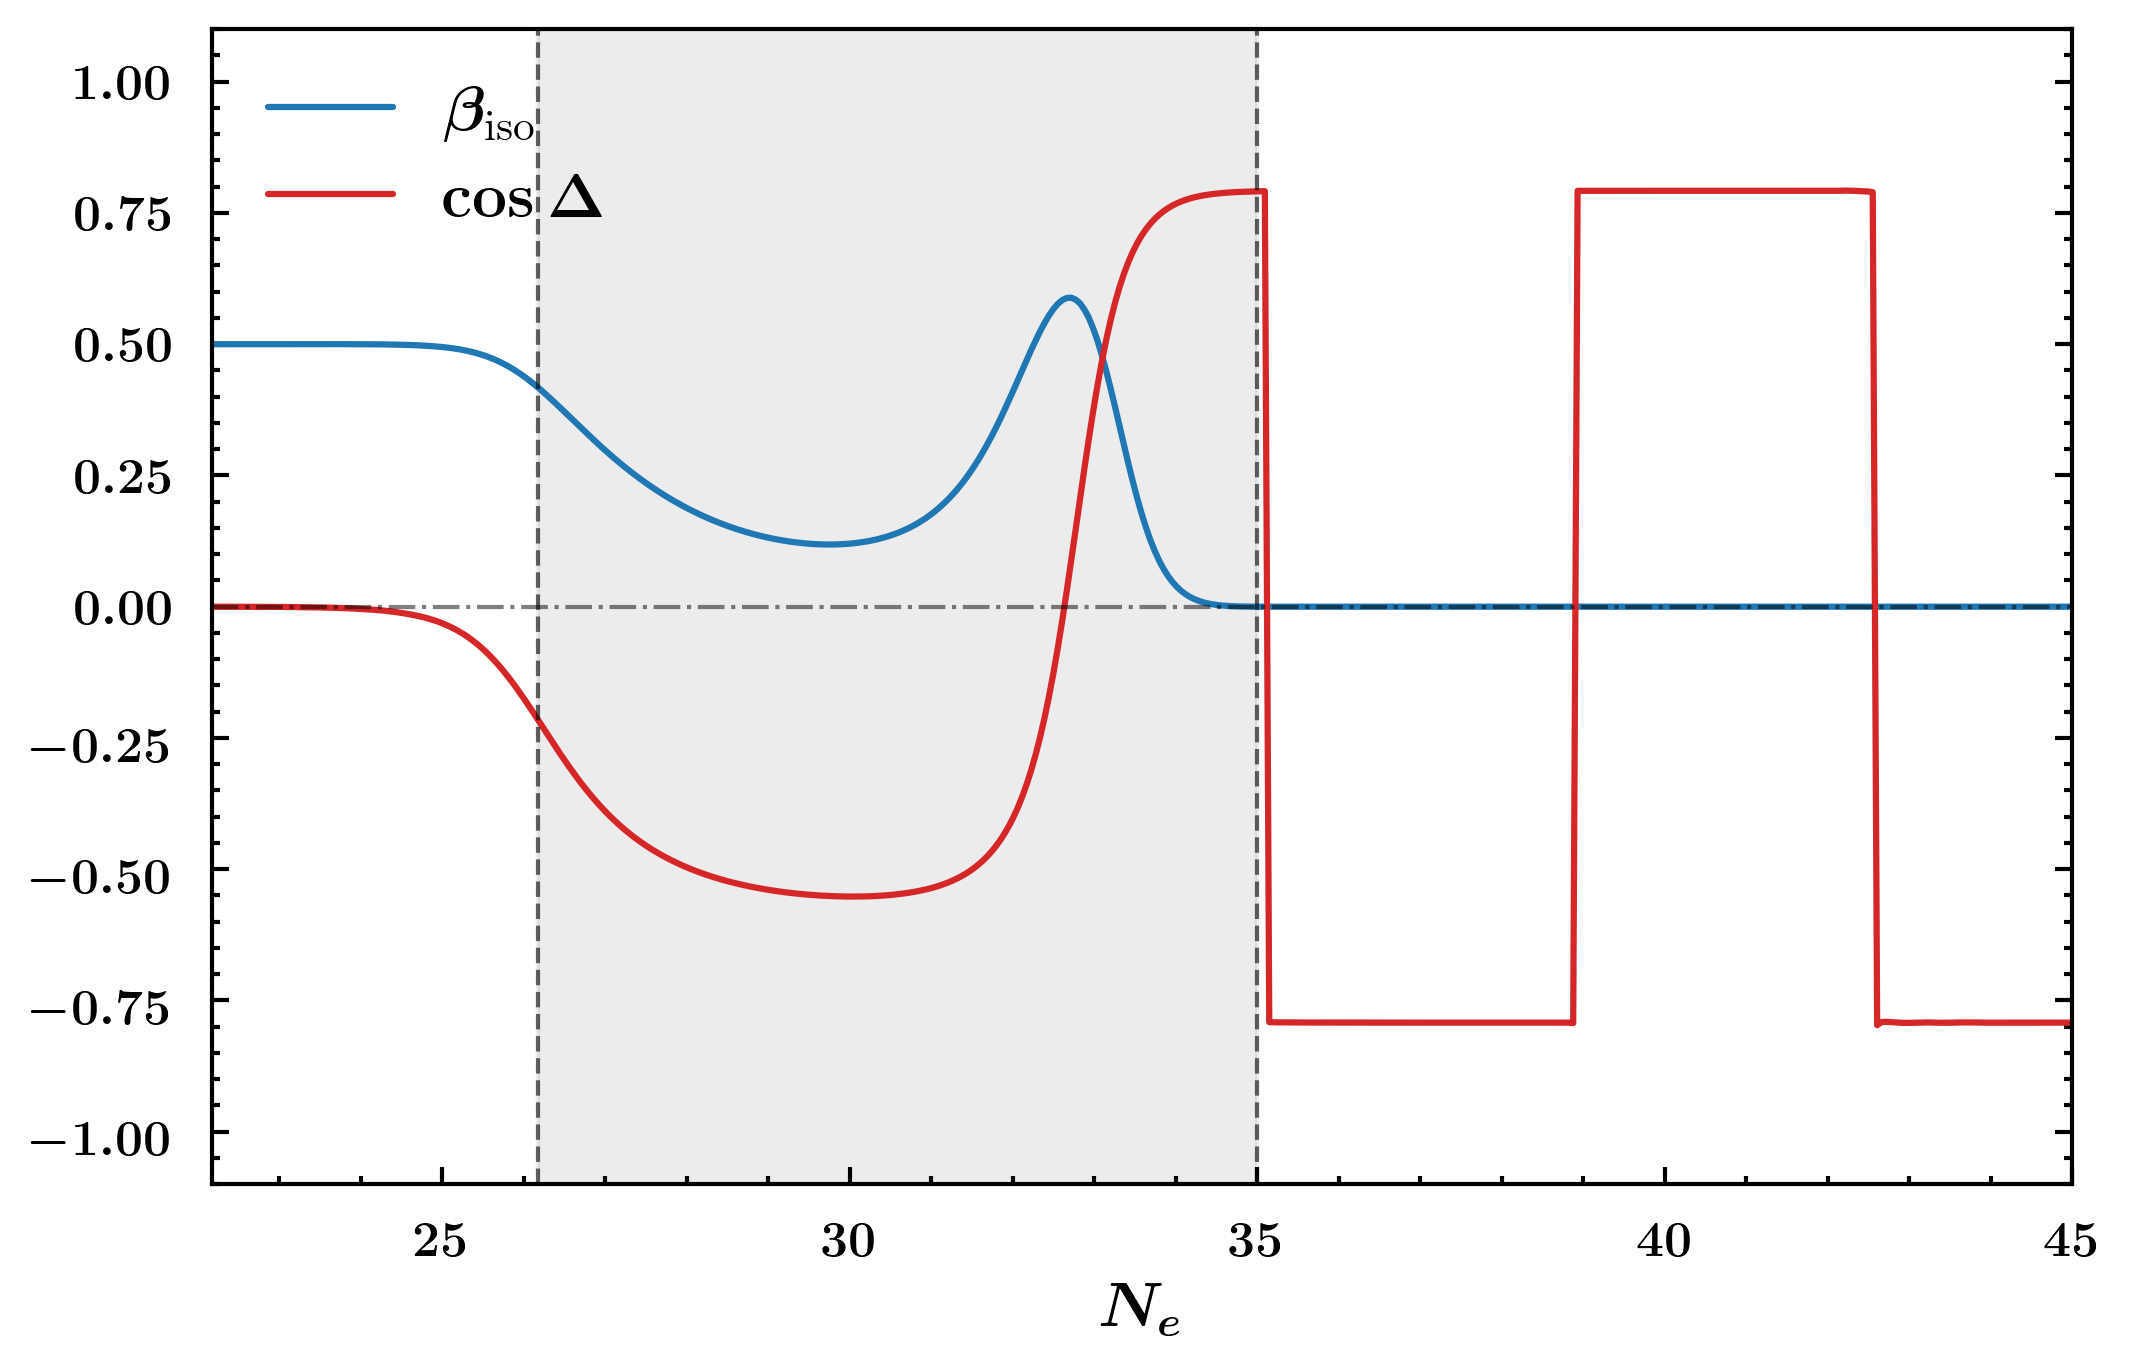

In [13]:
plt.plot(N, data['beta_iso'], label = r'$\beta_\text{iso}$' )
plt.plot(N, data['cosDelta'], label= r'$\cos \Delta$')
plt.axhline(0, color='k', linestyle='dashdot', linewidth=1, alpha=0.5)
plt.axvline(pert.N_hc(pert.k_CMB)[0], linestyle = 'dashed', linewidth= 1, color = 'k', alpha  = 0.6)
plt.axvline(35, linestyle = 'dashed', linewidth= 1, color = 'k', alpha  = 0.6)

Ne_turn_ini = pert.N_hc(pert.k_CMB)[0]
Ne_turn_end = 35

plt.axvspan(
    Ne_turn_ini,
    Ne_turn_end,
    color = 'gray',
    alpha=0.15,
    zorder=0
)

plt.ylim(-1.1, 1.1)
plt.xlim(pert.N_ini(0.05), 45)
plt.xlabel(r'$N_e$')
plt.legend()

#savefig('beta_iso_xi_0.1')

In [14]:
sol = pert.solver()
vars = ['N', 'R_re', 'dRdN_re', 'R_im', 'dRdN_im', 'Q_re', 'dQdN_re', 'Q_im', 'dQdN_im', 'h_re', 'dhdN_re', 'h_im', 'dhdN_im', 'P_R', 'P_S', 'P_t']
N, R_re, dRdN_re, R_im, dRdN_im, Q_re, dQdN_re, Q_im, dQdN_im, h_re, dhdN_re, h_im, dhdN_im, P_R, P_S, P_t = (pert.data[i] for i in vars)
Npivot = pert.N_hc(pert.k_CMB)

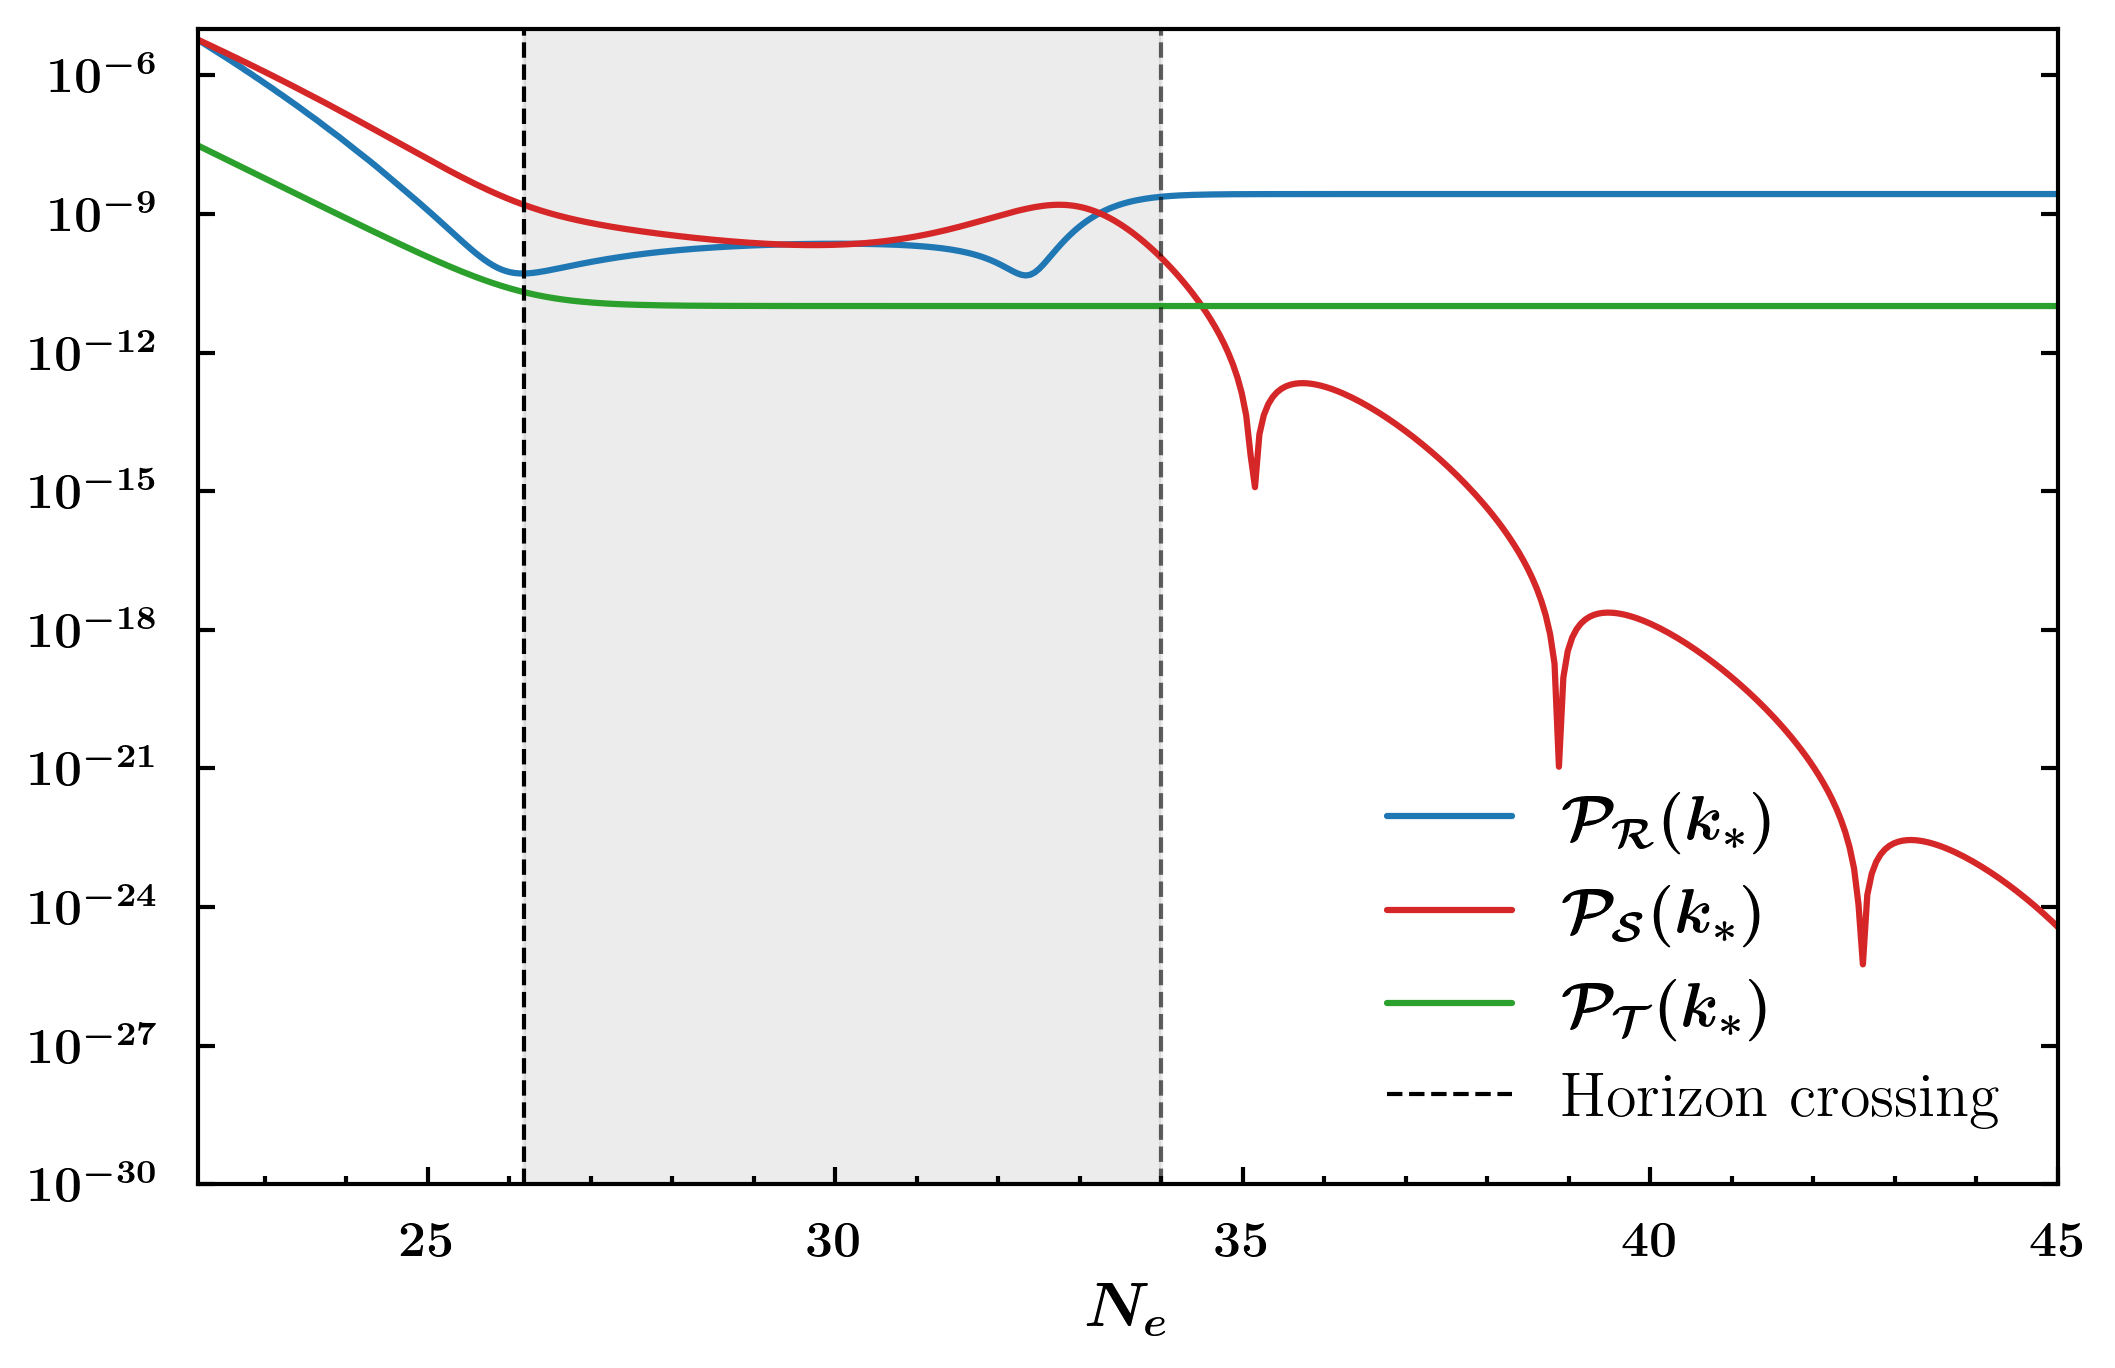

In [15]:
plt.semilogy(N, P_R, label = r"$\mathcal{P}_\mathcal{R}(k_*)$")
plt.semilogy(N, P_S, label = r"$\mathcal{P}_\mathcal{S}(k_*)$")
plt.semilogy(N, P_t, label = r"$\mathcal{P}_\mathcal{T}(k_*)$")
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')
plt.axvline(34, linestyle = 'dashed', linewidth= 1, color = 'k', alpha  = 0.6)

Ne_turn_ini = Npivot[0]
Ne_turn_end = 34

plt.axvspan(
    Ne_turn_ini,
    Ne_turn_end,
    color = 'gray',
    alpha=0.15,
    zorder=0
)

plt.xlabel(r"$N_e$")

plt.ylim(1e-30, 1e-5)
plt.xlim(pert.N_ini(pert.k_CMB), 45)
plt.legend(loc = 'lower right')
#savefig('powerspectrum_efolds1')

✅ Figura guardada en /Users/flaviopineda/Documents/Fisica/Proyectos/Generating isocurvature modes and primordial features in multi-field Higgs-R^2 inflation/Paper/Figures/adiabaticmode1.pdf


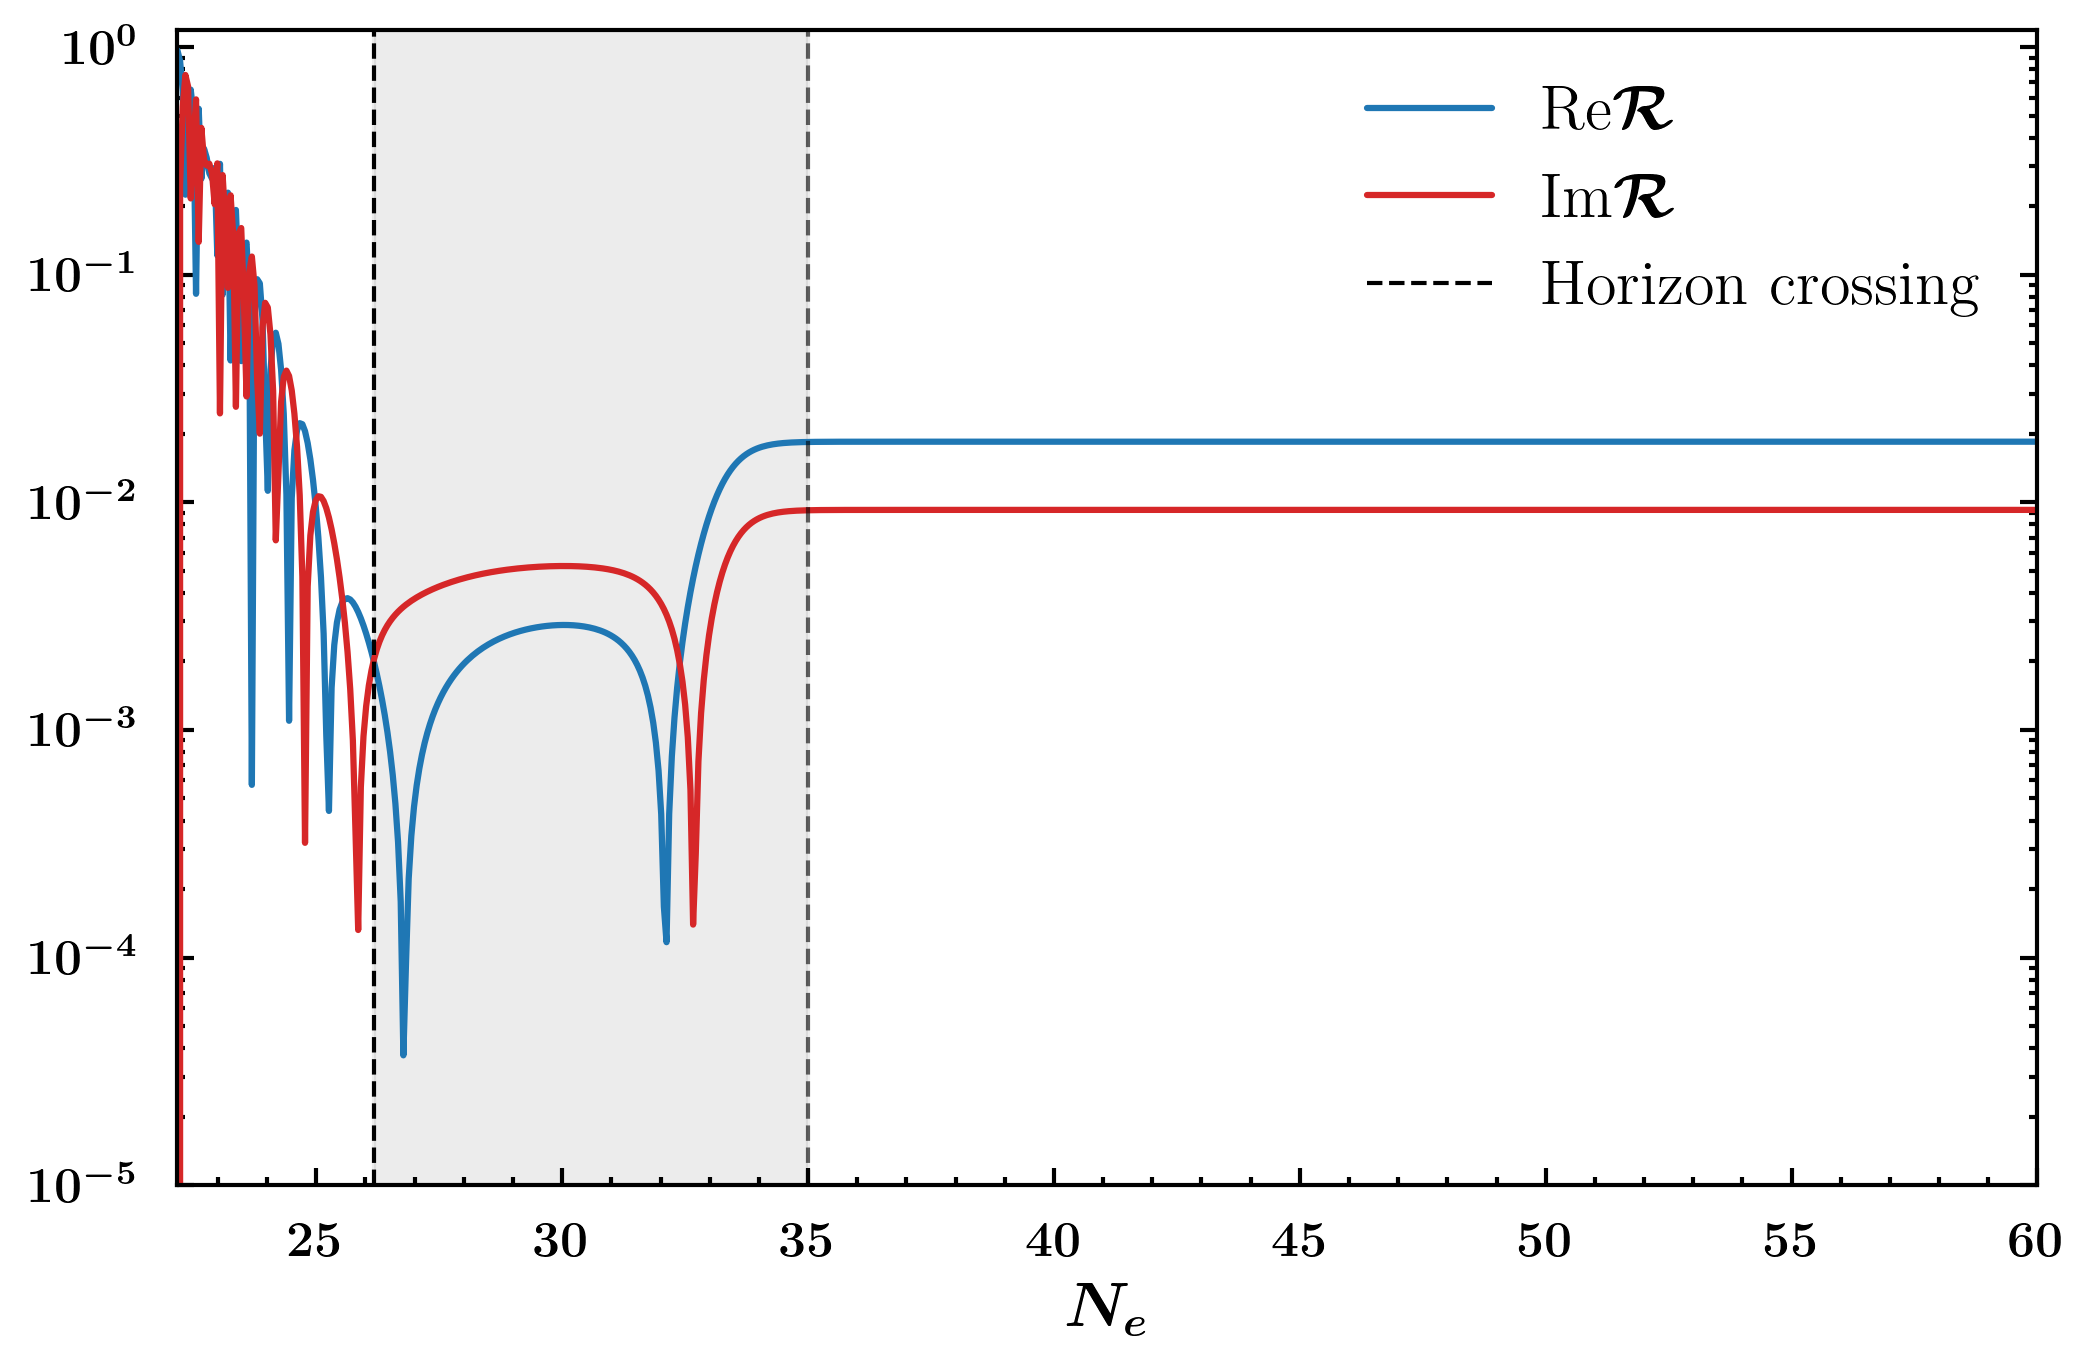

In [16]:
plt.semilogy(N, abs(R_re), label = r'$\text{Re}\mathcal{R}$')
plt.semilogy(N, abs(R_im), label = r'$\text{Im}\mathcal{R}$')
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')
plt.axvline(35, linestyle = 'dashed', linewidth= 1, color = 'k', alpha  = 0.6)

Ne_turn_ini = Npivot[0]
Ne_turn_end = 35

plt.axvspan(
    Ne_turn_ini,
    Ne_turn_end,
    color = 'gray',
    alpha=0.15,
    zorder=0
)
plt.xlabel(r"$N_e$")
plt.ylim(1e-5)
plt.xlim(pert.N_ini(pert.k_CMB), 60)

plt.legend()
savefig('adiabaticmode1')

✅ Figura guardada en /Users/flaviopineda/Documents/Fisica/Proyectos/Generating isocurvature modes and primordial features in multi-field Higgs-R^2 inflation/Paper/Figures/isomode1.pdf


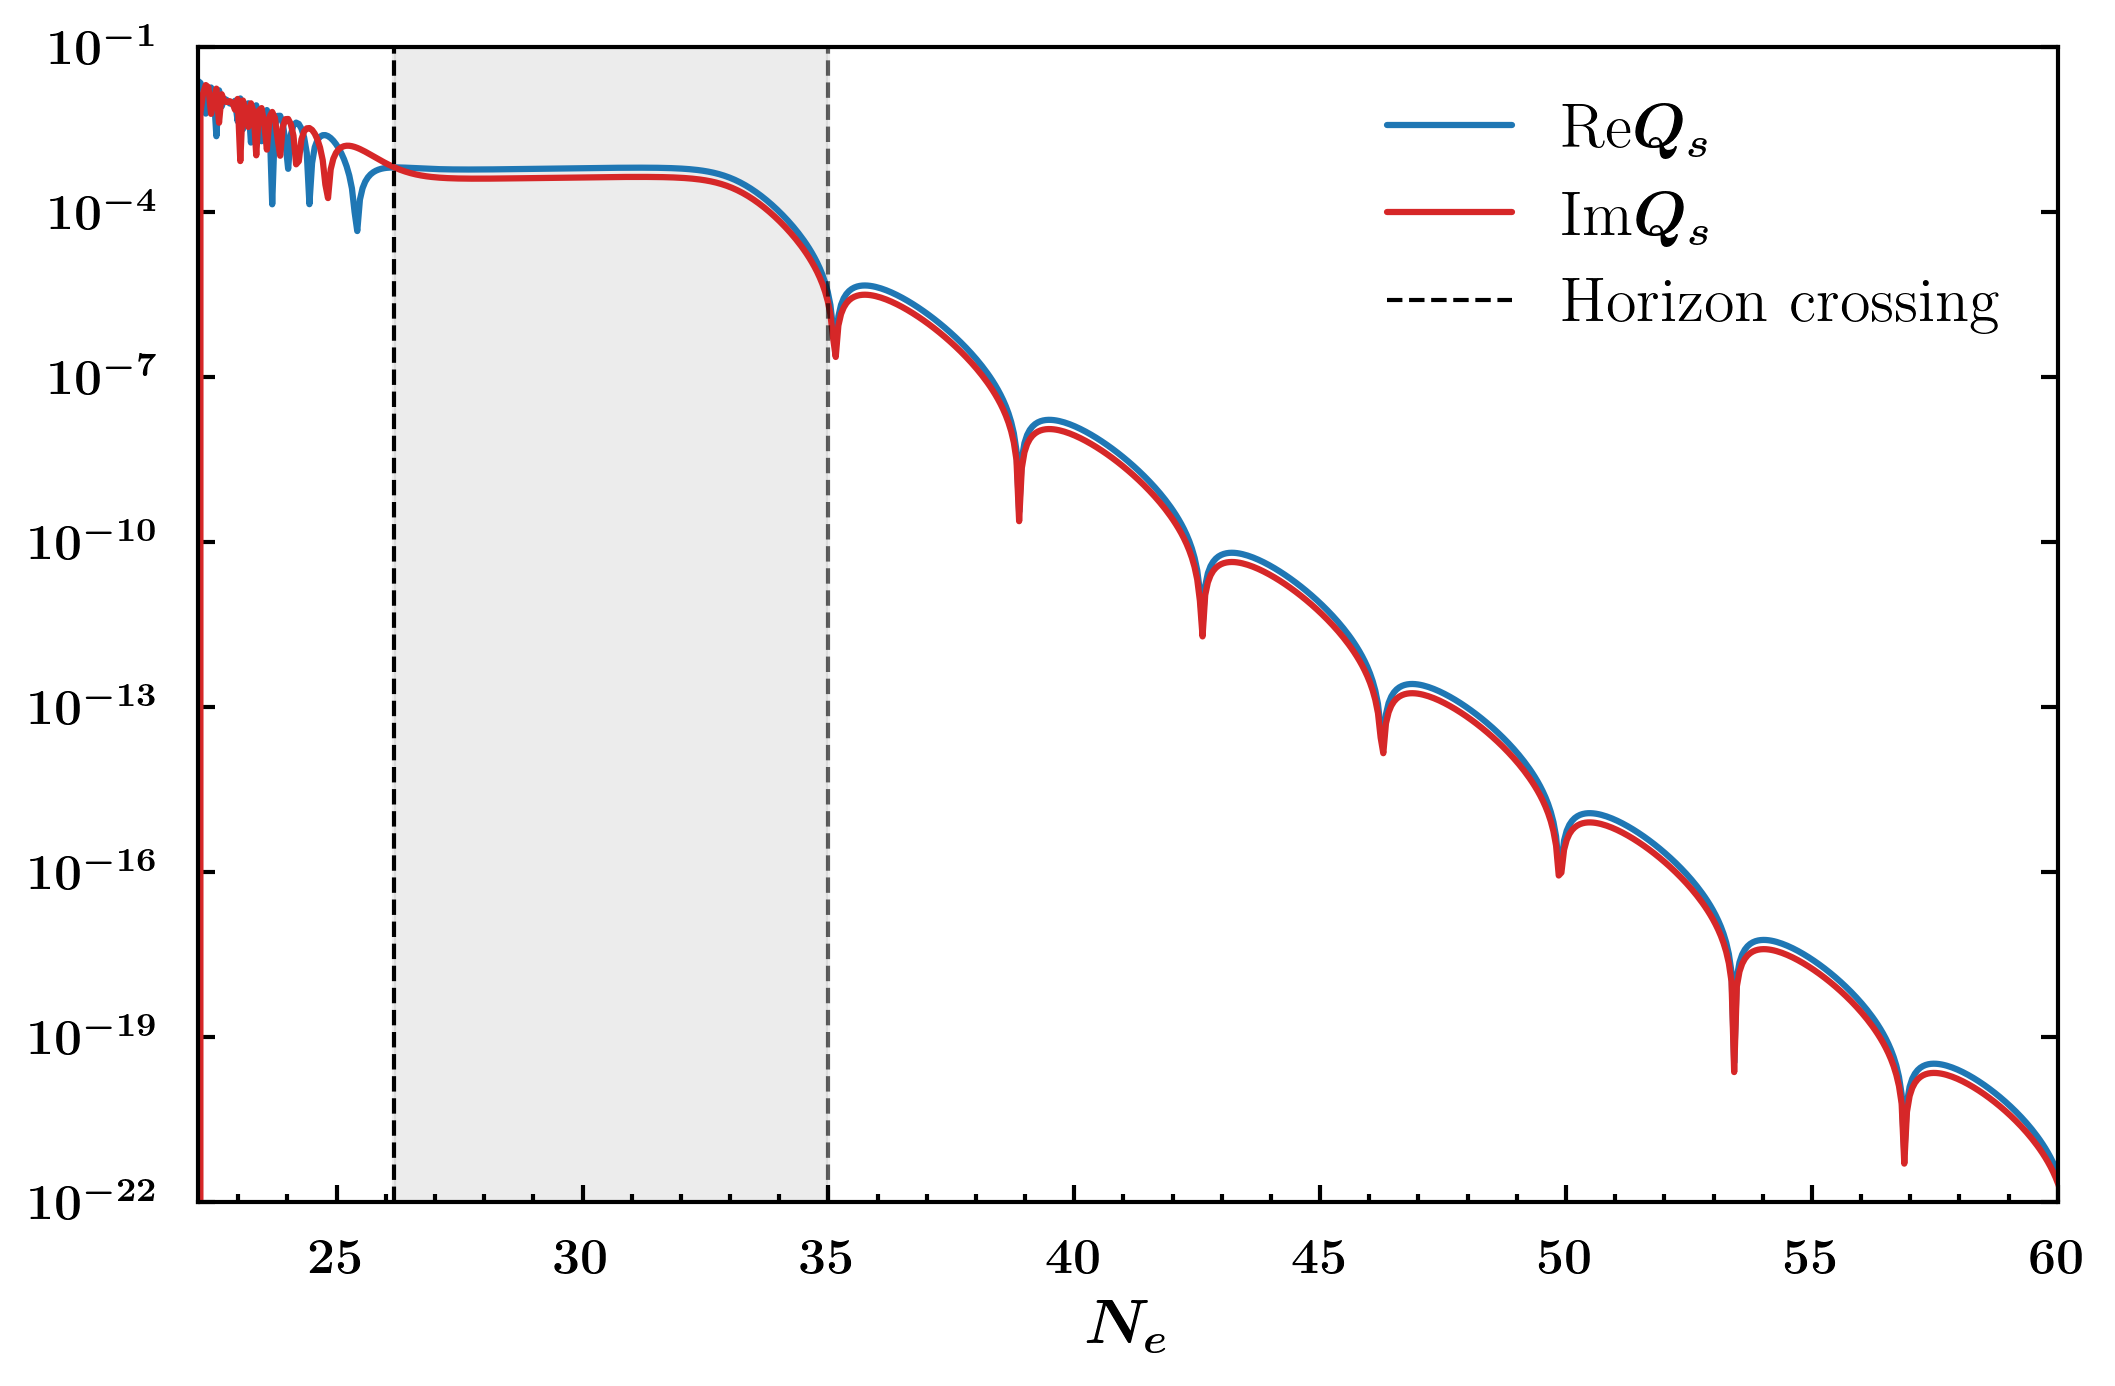

In [17]:
plt.semilogy(N, abs(Q_re), label = r'$\text{Re}Q_s$')
plt.semilogy(N, abs(Q_im), label = r'$\text{Im}Q_s$')
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')
plt.axvline(35, linestyle = 'dashed', linewidth= 1, color = 'k', alpha  = 0.6)

Ne_turn_ini = Npivot[0]
Ne_turn_end = 35

plt.axvspan(
    Ne_turn_ini,
    Ne_turn_end,
    color = 'gray',
    alpha=0.15,
    zorder=0
)
plt.xlabel(r"$N_e$")
plt.xlim(pert.N_ini(pert.k_CMB), 60)
plt.ylim(1e-22, 1e-1)


plt.legend()
savefig('isomode1')


In [18]:
Ps_end = pert.Power_spectrum_end(save = True)

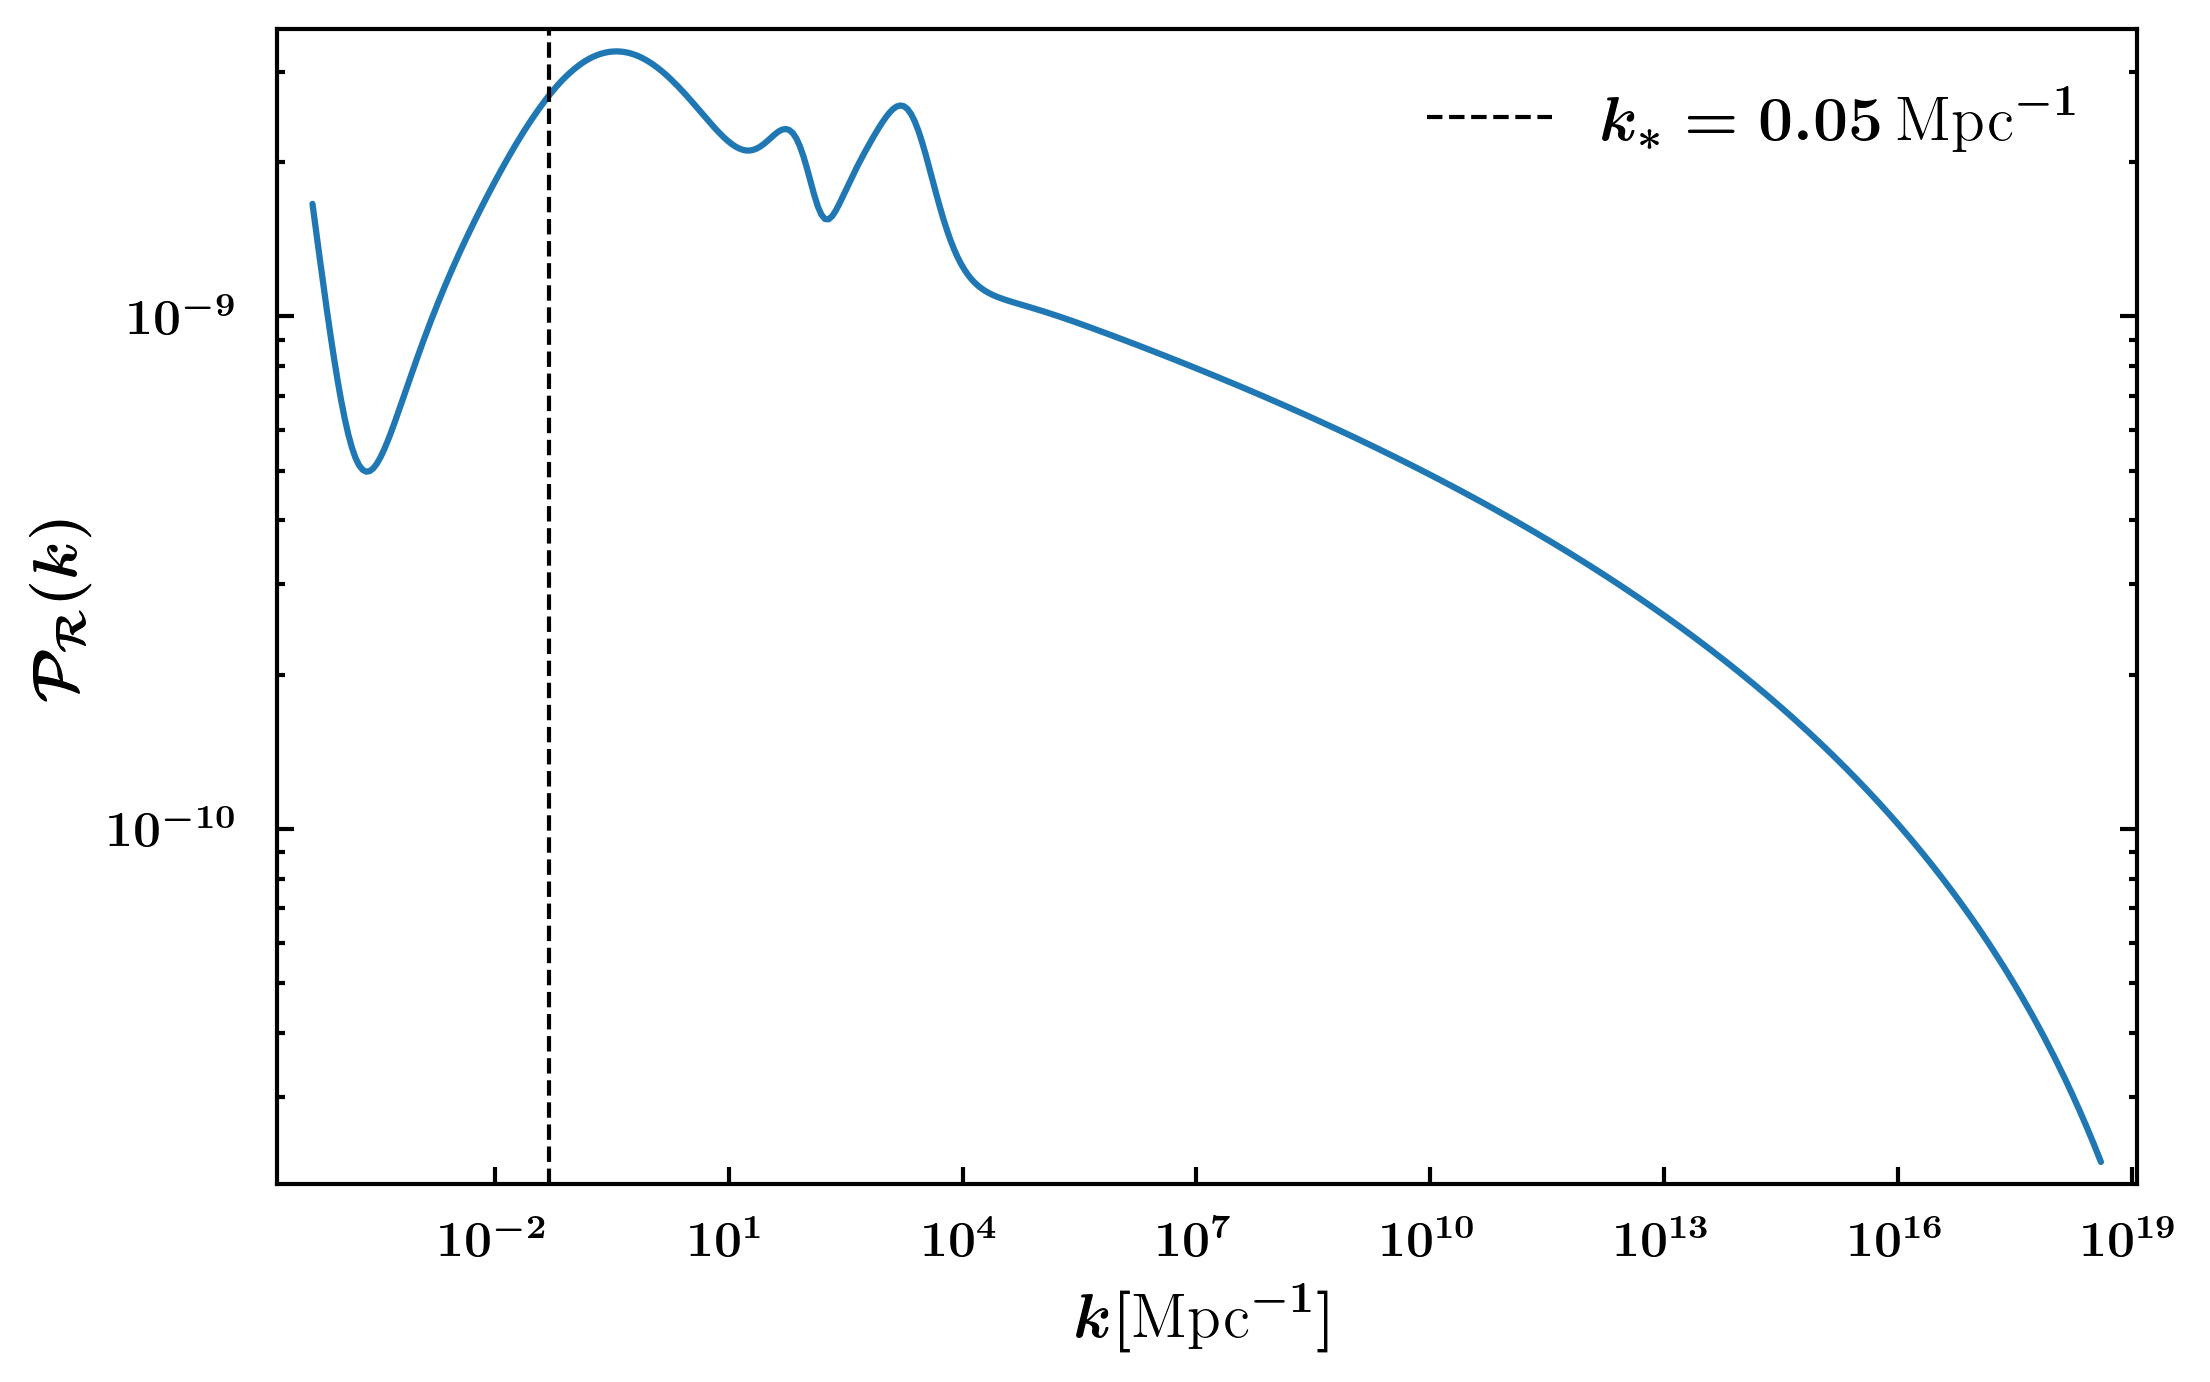

In [19]:
plt.loglog(pert.k_modes, Ps_end[0])

plt.axvline(pert.k_CMB, linewidth = 1, linestyle = 'dashed', color = 'k', label = r"$k_* = 0.05\,\text{Mpc}^{-1}$")

plt.ylabel(r"$\mathcal{P}_\mathcal{R}(k)$")
plt.xlabel(r"$k[\text{Mpc}^{-1}]$")

plt.legend()
#savefig('PS_adiabatic1')